# Twitter Sentiment Analysis: LuxWorld and Travel to Earn

## 2. Data preprocessing

Read the dataset we have scraped in the first part. 

In [14]:
luxworld_tweet = pd.read_csv("tweets_luxworld.csv")

In [15]:
luxworld_tweet.head()

,Datetime,User,Tweet Id,Text
0,2022-12-25 15:08:39+00:00,0xiqbalSCP001,1607030569472528386,I just won a raffle for @buster_ranger from @L...
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,@AycanEverley @frjsr714810 @Gameverse_ @ethere...
2,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,@LuxWorld_ When #LuxWorld combines #Move2Earn ...
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,@LucasMaxxx11 @LuxWorld_ maybe both in real li...
4,2022-12-25 10:54:06+00:00,james19_oliver,1606966510962216960,"@LuxWorld_ LFG #LuxWorld, I believe in your pr..."


In [16]:
t2e_tweet = pd.read_csv("tweets_t2e.csv")

In [17]:
m2e_tweet = pd.read_csv("tweets_m2e.csv")

The preprocessing of the text data is an essential step as it makes the raw text ready for analysis. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

The dataset above has 4 columns Datetime, user, id, and text contains the tweets that we will clean and preprocess.

**Removing Twitter Handles (@user)**

The tweets contain lots of twitter handles (@user), that is how a Twitter user acknowledged on Twitter. We will remove all these twitter handles from the data as they don’t convey much information.

In [18]:
import re 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import string 
import nltk 
import textblob
from textblob import TextBlob
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [19]:
#create a function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt):     
    r = re.findall('@[\w]*', input_txt)     
    for i in r:         
        input_txt = re.sub(i, '', input_txt)              
    return input_txt

Now let’s create a new column clean_tweet, it will contain the cleaned and processed tweets. 

In [20]:
luxworld_tweet["clean_tweet"] = luxworld_tweet["Text"].apply(remove_pattern) #Luxworld dataset

In [21]:
m2e_tweet["clean_tweet"] = m2e_tweet["Text"].apply(remove_pattern) #travel2earn dataset

In [22]:
t2e_tweet["clean_tweet"] = t2e_tweet["Text"].apply(remove_pattern) #move2earn dataset

In [23]:
#check if it works or not
luxworld_tweet["clean_tweet"][:5]

0    I just won a raffle for  from  on !\n\n🎉 LFG #...
1                 Wow, I am really fascinated by this.
2     When #LuxWorld combines #Move2Earn and #Trave...
3      maybe both in real life and in metaverse cau...
4     LFG #LuxWorld, I believe in your project and ...
Name: clean_tweet, dtype: object

Drop the Text column from the 3 dataset. 

In [24]:
luxworld_tweet.drop("Text", axis = 1, inplace=True)

In [25]:
t2e_tweet.drop("Text", axis = 1, inplace=True)

In [26]:
m2e_tweet.drop("Text", axis = 1, inplace=True)

In NLP projects, we need to remove punctuation from the text. However, we should be very careful when we perform such tasks, depending on the project since punctuations can actually be very important like sentiment analysis. It is true for this project, I will keep the hashtag because it is important for realizing trends. 

**Remove Punctuation and Stopwords**

One common text preprocessing technique is to remove the punctuations from the text data. This is a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

In [27]:
#let’s get all the punctuation.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
#remove hashtag from the punctuations to be removed
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

At the same time, we also need to remove stopwords from the dataset. A stop word is a commonly used word (such as "the", "a", "an", "in"), we would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. 

In [29]:
#import natural language tool kit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vimoney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
def tweet_cleaning(tweet):
    tweet_punc_removed = [char for char in tweet if char not in punctuation]
    tweet_punc_removed_join = ''.join(tweet_punc_removed)
    tweet_punc_removed_join_stopwords = [word for word in tweet_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    tweet_clean = ' '.join(tweet_punc_removed_join_stopwords)
    return tweet_clean

In [31]:
luxworld_tweet["clean_tweet"] = luxworld_tweet["clean_tweet"].apply(tweet_cleaning)

In [32]:
t2e_tweet["clean_tweet"] = t2e_tweet["clean_tweet"].apply(tweet_cleaning)

In [33]:
m2e_tweet["clean_tweet"] = m2e_tweet["clean_tweet"].apply(tweet_cleaning)

In [34]:
luxworld_tweet.head(5)

,Datetime,User,Tweet Id,clean_tweet
0,2022-12-25 15:08:39+00:00,0xiqbalSCP001,1607030569472528386,raffle 🎉 LFG #Alphabot 🎉 httpstcobjA7V58mgF
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,Wow really fascinated
2,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,#LuxWorld combines #Move2Earn #Travel2Earn big...
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,maybe real life metaverse cause web 3 project ...
4,2022-12-25 10:54:06+00:00,james19_oliver,1606966510962216960,LFG #LuxWorld believe project dont let


**Case Normalization**

In this, we simply convert the case of all characters in the text to either upper or lower case. As python is a case sensitive language so the main goal is to convert the text into the lower casing so that ‘apple’, ‘Apple’ and ‘APPLE’ are treated the same way.

In [35]:
luxworld_tweet["clean_tweet"] = luxworld_tweet["clean_tweet"].str.lower() 

In [36]:
t2e_tweet["clean_tweet"] = t2e_tweet["clean_tweet"].str.lower() 

In [37]:
m2e_tweet["clean_tweet"] = m2e_tweet["clean_tweet"].str.lower() 

**Stemming and Lemmatization**

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example — “play”, “player”, “played”, “plays” and “playing” are the different variations of the word — “play”.

In [38]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [39]:
luxworld_tweet['Text_tokenized'] = luxworld_tweet['clean_tweet'].apply(lambda x: tokenization(x.lower()))


In [40]:
luxworld_tweet.head()

,Datetime,User,Tweet Id,clean_tweet,Text_tokenized
0,2022-12-25 15:08:39+00:00,0xiqbalSCP001,1607030569472528386,raffle 🎉 lfg #alphabot 🎉 httpstcobja7v58mgf,"[raffle, lfg, alphabot, httpstcobja7v58mgf]"
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,wow really fascinated,"[wow, really, fascinated]"
2,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,#luxworld combines #move2earn #travel2earn big...,"[, luxworld, combines, move2earn, travel2earn,..."
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,maybe real life metaverse cause web 3 project ...,"[maybe, real, life, metaverse, cause, web, 3, ..."
4,2022-12-25 10:54:06+00:00,james19_oliver,1606966510962216960,lfg #luxworld believe project dont let,"[lfg, luxworld, believe, project, dont, let]"


In [41]:
t2e_tweet['Text_tokenized'] = t2e_tweet['clean_tweet'].apply(lambda x: tokenization(x.lower()))

In [42]:
m2e_tweet['Text_tokenized'] = m2e_tweet['clean_tweet'].apply(lambda x: tokenization(x.lower()))

In [43]:
# I will use PorterStemmer from the NLTK library for stemming process
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


In [44]:
luxworld_tweet['Text_stemmed'] = luxworld_tweet['Text_tokenized'].apply(lambda x: stemming(x))
t2e_tweet['Text_stemmed'] = t2e_tweet['Text_tokenized'].apply(lambda x: stemming(x))
m2e_tweet['Text_stemmed'] = m2e_tweet['Text_tokenized'].apply(lambda x: stemming(x))

In [45]:
luxworld_tweet.head()

,Datetime,User,Tweet Id,clean_tweet,Text_tokenized,Text_stemmed
0,2022-12-25 15:08:39+00:00,0xiqbalSCP001,1607030569472528386,raffle 🎉 lfg #alphabot 🎉 httpstcobja7v58mgf,"[raffle, lfg, alphabot, httpstcobja7v58mgf]","[raffl, lfg, alphabot, httpstcobja7v58mgf]"
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,wow really fascinated,"[wow, really, fascinated]","[wow, realli, fascin]"
2,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,#luxworld combines #move2earn #travel2earn big...,"[, luxworld, combines, move2earn, travel2earn,...","[, luxworld, combin, move2earn, travel2earn, b..."
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,maybe real life metaverse cause web 3 project ...,"[maybe, real, life, metaverse, cause, web, 3, ...","[mayb, real, life, metavers, caus, web, 3, pro..."
4,2022-12-25 10:54:06+00:00,james19_oliver,1606966510962216960,lfg #luxworld believe project dont let,"[lfg, luxworld, believe, project, dont, let]","[lfg, luxworld, believ, project, dont, let]"


Lemmatization takes the word to its root form. It helps to bring words to their dictionary form. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.

In [46]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    text = " ".join(text)
    return text


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vimoney\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
luxworld_tweet['Text_lemmatized'] = luxworld_tweet['Text_tokenized'].apply(lambda x: lemmatizer(x))

In [48]:
t2e_tweet['Text_lemmatized'] = t2e_tweet['Text_tokenized'].apply(lambda x: lemmatizer(x))
m2e_tweet['Text_lemmatized'] = m2e_tweet['Text_tokenized'].apply(lambda x: lemmatizer(x))

In [49]:
luxworld_tweet.head()

,Datetime,User,Tweet Id,clean_tweet,Text_tokenized,Text_stemmed,Text_lemmatized
0,2022-12-25 15:08:39+00:00,0xiqbalSCP001,1607030569472528386,raffle 🎉 lfg #alphabot 🎉 httpstcobja7v58mgf,"[raffle, lfg, alphabot, httpstcobja7v58mgf]","[raffl, lfg, alphabot, httpstcobja7v58mgf]",raffle lfg alphabot httpstcobja7v58mgf
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,wow really fascinated,"[wow, really, fascinated]","[wow, realli, fascin]",wow really fascinated
2,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,#luxworld combines #move2earn #travel2earn big...,"[, luxworld, combines, move2earn, travel2earn,...","[, luxworld, combin, move2earn, travel2earn, b...",luxworld combine move2earn travel2earn big boom
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,maybe real life metaverse cause web 3 project ...,"[maybe, real, life, metaverse, cause, web, 3, ...","[mayb, real, life, metavers, caus, web, 3, pro...",maybe real life metaverse cause web 3 project ...
4,2022-12-25 10:54:06+00:00,james19_oliver,1606966510962216960,lfg #luxworld believe project dont let,"[lfg, luxworld, believe, project, dont, let]","[lfg, luxworld, believ, project, dont, let]",lfg luxworld believe project dont let


In [50]:
#drop the unwanted columns after preprocessing
luxworld_tweet.drop(columns=['clean_tweet', 'Text_tokenized', 'Text_stemmed'], inplace=True)

In [51]:
t2e_tweet.drop(columns=['clean_tweet', 'Text_tokenized', 'Text_stemmed'], inplace=True)

In [52]:
m2e_tweet.drop(columns=['clean_tweet', 'Text_tokenized', 'Text_stemmed'], inplace=True)

In [53]:
#merge the dataset travel2earn and move2earn for analysis in the next part.
trend_tweets = pd.concat([t2e_tweet, m2e_tweet])

In [54]:
trend_tweets.shape

(7991, 4)

In [55]:
trend_tweets.head()

,Datetime,User,Tweet Id,Text_lemmatized
0,2022-12-25 11:02:16+00:00,TommyWang2211,1606968564254404610,luxworld combine move2earn travel2earn big boom
1,2022-12-23 19:30:56+00:00,NobleMoody_357,1606371799872438272,getfit move2earn play2earn travel2earn reward...
2,2022-12-21 18:18:57+00:00,KnShayeMedia,1605628909902368769,let s get getfit tagcoin tagprotocol gfam move...
3,2022-12-20 16:02:15+00:00,sandy_carter,1605232117494988802,another amazing use login unstoppable arivawon...
4,2022-12-20 02:00:01+00:00,GetFitMining,1605020162385534976,1 follow u 2 retweet 3 tag 3 friend amp commen...


Now we have clean dataset without redundant words. 

## 3. Sentiment Analysis

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. Here, I am using this library to perform text classification in either positive or negative on the basis of sentiment analysis.

In [56]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [57]:
# using the functions to get the polarity and sentiment for luxworld_tweet
luxworld_tweet['Polarity'] = luxworld_tweet['Text_lemmatized'].apply(polarity)
luxworld_tweet['Sentiment'] = luxworld_tweet['Polarity'].apply(sentimenttextblob)
lux_sent = luxworld_tweet['Sentiment'].value_counts()
lux_sent

Positive    3593
Neutral     2992
Negative     253
Name: Sentiment, dtype: int64

In [58]:
# using the functions to get the polarity and sentiment for trends_tweet
trend_tweets['Polarity'] = trend_tweets['Text_lemmatized'].apply(polarity)
trend_tweets['Sentiment'] = trend_tweets['Polarity'].apply(sentimenttextblob)
trend_sent = trend_tweets['Sentiment'].value_counts()
trend_sent

Positive    4957
Neutral     2483
Negative     551
Name: Sentiment, dtype: int64

## 4. Data Visualization

Let's visualize to get the better understanding of the sentiment analysis

**Countplot the Sentiment**

Text(0, 0.5, 'Number of sentiment')

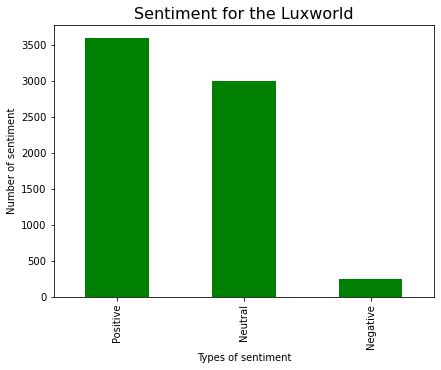

In [59]:
# plotting bar chart for the Sentiment of Luxworld 
plt.subplot(1,2,1)
lux_sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment for the Luxworld', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment')

Text(0, 0.5, 'Number of sentiment')

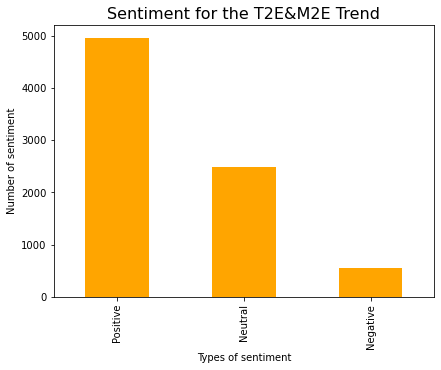

In [60]:
# plotting bar chart for the Sentiment of Move to earn and travel to earn
plt.subplot(1,2,1)
trend_sent.plot(kind='bar', color=['Orange'], figsize=(15,5))
plt.title('Sentiment for the T2E&M2E Trend', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment')

Text(0.5, 0.98, 'Sentiment Distribution')

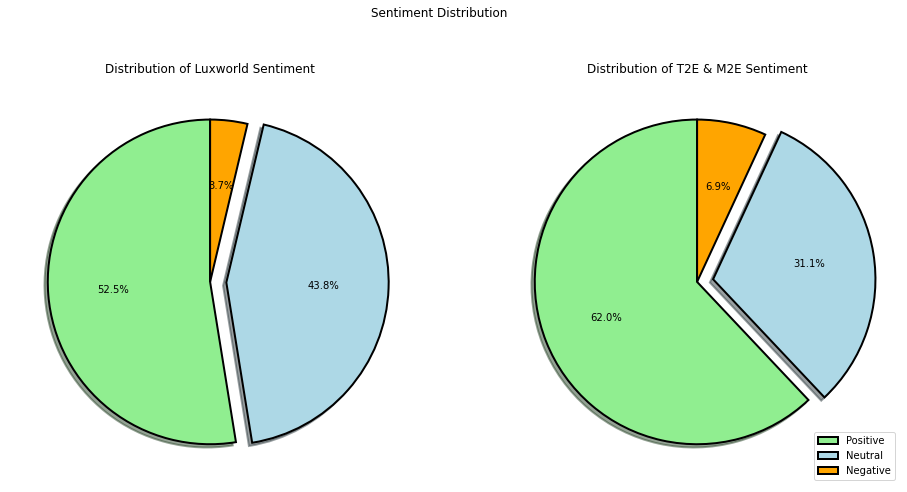

In [131]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (16,8))
explode=(0,0.1,0)
colors = ('lightgreen', 'lightblue', 'orange')

# Create a pie plot to show percentage distribution of Sentiment
ax[0].pie(lux_sent, autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode = explode)
ax[0].set_title('Distribution of Luxworld Sentiment')

ax[1].pie(trend_sent, autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode = explode)
ax[1].set_title('Distribution of T2E & M2E Sentiment')
ax[1].legend(trend_sent.keys().tolist())
# Add a title to the Figure
fig.suptitle('Sentiment Distribution')

**Wordcloud Visualization**

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

In [61]:
!pip install wordcloud

In [62]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [63]:
#another data wrangling process
# convert the tweet text into a string separate with " "
lux_string = luxworld_tweet['Text_lemmatized'].tolist()
lux_string = " ".join(lux_string)

In [64]:
lux_string[:10]

'raffle lfg'

In [65]:
#Define a list of stop words


#A function to generate the word cloud from text
def generate_wordcloud(data, title, stopwords, color, bcolor):
    cloud = WordCloud(width=7000,
                      height=5000,
                      max_words=150,
                      colormap=color,
                      background_color=bcolor,
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()
    


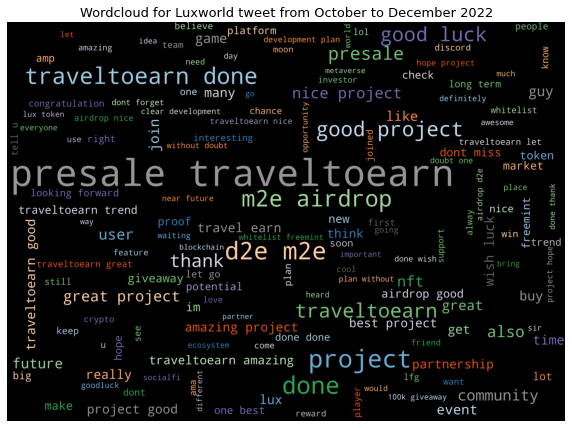

In [66]:
#Use the function to generate the word cloud
generate_wordcloud(lux_string, 'Wordcloud for Luxworld tweet from October to December 2022', ['luxworld', 'LuxWorld', 'LuxWorld'], 'tab20c', 'black')

In [67]:
# Taking separate dataframes for different values such as positive, negative and neutral reviews respectively for Luxworld 

positive_lux = luxworld_tweet[luxworld_tweet['Sentiment'] == 'Positive']
negative_lux = luxworld_tweet[luxworld_tweet['Sentiment'] == 'Negative']
neutral_lux = luxworld_tweet[luxworld_tweet['Sentiment'] == 'Neutral']

In [68]:
positive_lux.head()

,Datetime,User,Tweet Id,Text_lemmatized,Polarity,Sentiment
1,2022-12-25 12:47:32+00:00,PealsSamyeli,1606995057843789828,wow really fascinated,0.150000,Positive
3,2022-12-25 10:55:43+00:00,james19_oliver,1606966915850989570,maybe real life metaverse cause web 3 project ...,0.100000,Positive
7,2022-12-25 10:43:33+00:00,Masknetwork2021,1606963854537547776,thanks shared wonderful opportunity best wish ...,0.733333,Positive
8,2022-12-25 10:37:38+00:00,GwenEverton10,1606962367157637122,came friend tagged anything interesting luxwor...,0.500000,Positive
10,2022-12-25 10:32:34+00:00,HugoJoseph34,1606961092223438852,many gift 𝐂𝐇𝐑𝐈𝐒𝐓𝐌𝐀𝐒 ga luxworld traveltoearn,0.500000,Positive


In [69]:
# Taking separate dataframes for different values such as positive, negative and neutral reviews respectively for trend tweet

positive_trend = trend_tweets[trend_tweets['Sentiment'] == 'Positive']
negative_trend = trend_tweets[trend_tweets['Sentiment'] == 'Negative']
neutral_trend = trend_tweets[trend_tweets['Sentiment'] == 'Neutral']

**Positive Text WordCloud**

In [70]:
positive_lux = positive_lux['Text_lemmatized'].tolist() #convert the Luxworld positive tweet text into a string
positive_lux = " ".join(positive_lux)

In [71]:
positive_lux[:5]

'wow r'

In [72]:
positive_trend = positive_trend['Text_lemmatized'].tolist() #convert the trend positive tweet text into a string
positive_trend = " ".join(positive_trend)

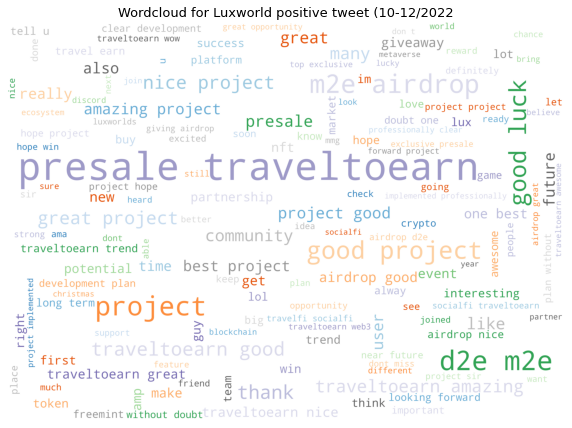

In [73]:
#Use the generate function above to generate the word cloud for postive tweets
generate_wordcloud(positive_lux, 'Wordcloud for Luxworld positive tweet (10-12/2022',['luxworld', 'LuxWorld', 'LuxWorld'], 'tab20c', 'white')

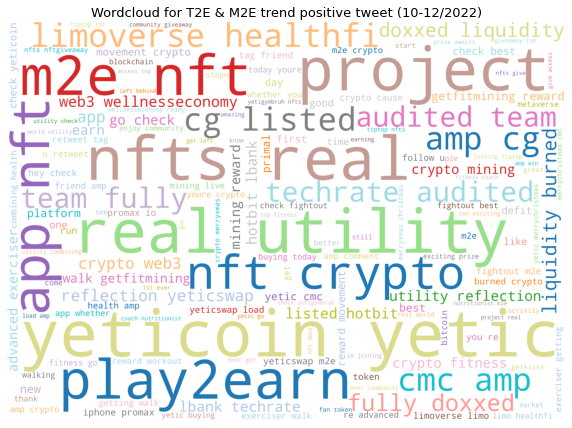

In [74]:

generate_wordcloud(positive_trend, 'Wordcloud for T2E & M2E trend positive tweet (10-12/2022)', ['travel to earn', 'move to earn', 'Travel2Earn', 'Traveltoearn', 'Movetoearn', 'Move2Earn'], 'tab20', 'white')

**Negative Text WordCloud**

In [75]:
negative_lux = negative_lux['Text_lemmatized'].tolist() #convert the Luxworld negative tweet text into a string
negative_lux = " ".join(negative_lux)

In [76]:
negative_trend = negative_trend['Text_lemmatized'].tolist() #convert the Luxworld positive tweet text into a string
negative_trend = " ".join(negative_trend)

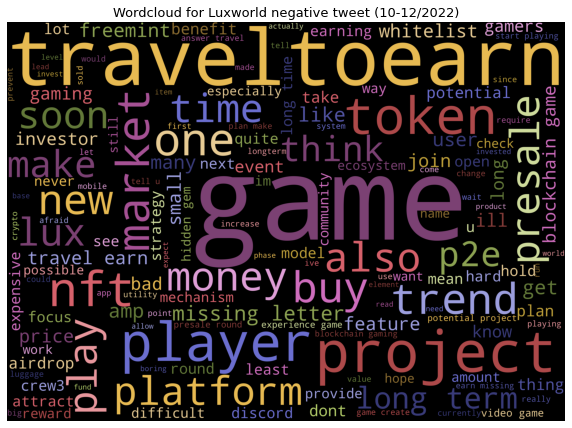

In [77]:
#Use the generate function above to generate the word cloud for Luxworld negative tweets
generate_wordcloud(negative_lux, 'Wordcloud for Luxworld negative tweet (10-12/2022)',['luxworld', 'LuxWorld', 'LuxWorld'], 'tab20b', 'black')

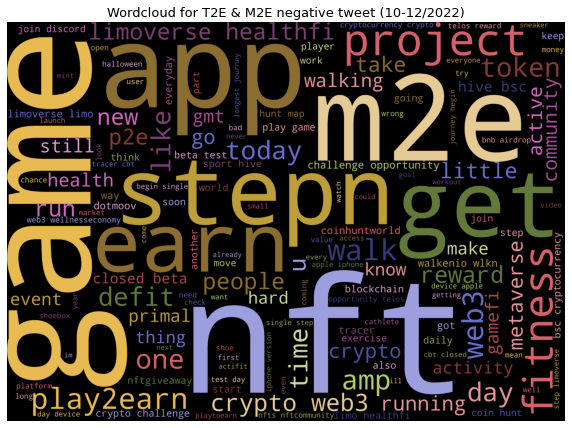

In [80]:
#Use the generate function above to generate the word cloud for Luxworld negative tweets
generate_wordcloud(negative_trend, 'Wordcloud for T2E & M2E negative tweet (10-12/2022)',['travel to earn', 'move to earn', 'Travel2Earn', 'Traveltoearn', 'Movetoearn', 'Move2Earn'], 'tab20b', 'black')

**Barplot the highest occurring words**

In [97]:
#top 20 words on Luxworld positive tweets
list_pos_words = [ x for x in positive_lux.split()] #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_pos_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())}) #data frame of words and count

In [98]:
# selecting top 20 most frequent words
freq_dataframe = freq_dataframe.nlargest(columns='Count', n = 20)

In [105]:
freq_dataframe.head()

,Words,Count
13,luxworld,2367
10,project,1653
14,traveltoearn,1538
63,presale,1005
119,good,843


In [100]:
#top 20 words on Trend positive tweets
list_pos_words_trend = [ x for x in positive_trend.split()] 
freq_dis_pos_trend = nltk.FreqDist(list_pos_words_trend)
freq_dataframe_trend = pd.DataFrame({'Words': list(freq_dis_pos_trend.keys()), 'Count': list(freq_dis_pos_trend.values())})

In [101]:
# selecting top 20 most frequent words
freq_dataframe_trend = freq_dataframe_trend.nlargest(columns='Count', n = 20)

In [102]:
freq_dataframe_trend.head()

,Words,Count
1,move2earn,5206
6,crypto,1785
565,movetoearn,1439
140,app,1190
428,m2e,1174


C:\Users\Vimoney\AppData\Local\Temp/ipykernel_12908/227443590.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(freq_dataframe.Words, rotation=90)
C:\Users\Vimoney\AppData\Local\Temp/ipykernel_12908/227443590.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(freq_dataframe_trend.Words, rotation=90)


Text(0.5, 0.98, 'Top highest occurring words in positive tweets')

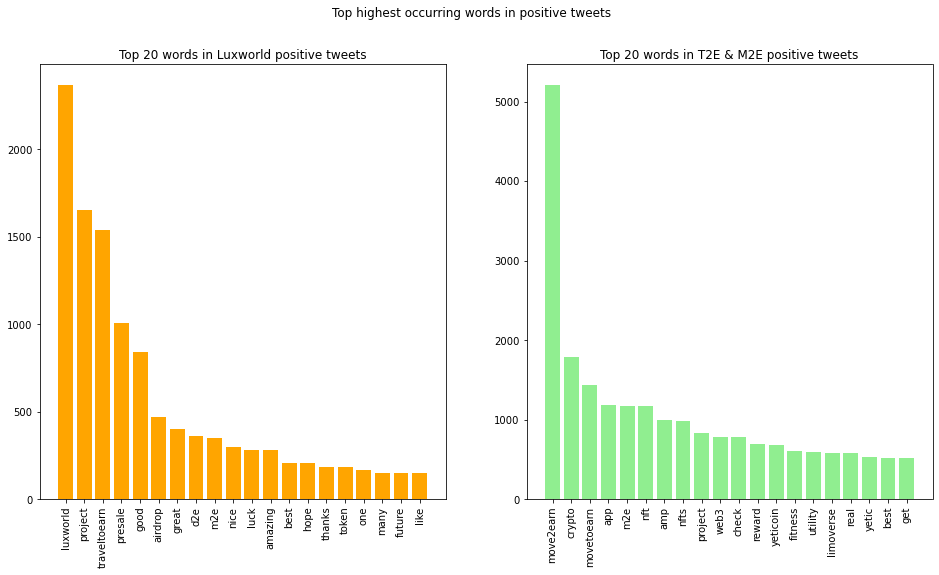

In [115]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# Create a bar plot of word vs count on the first axis
ax[0].bar(x=freq_dataframe.Words, height=freq_dataframe.Count, color='orange')
ax[0].set_title('Top 20 words in Luxworld positive tweets')
ax[0].set_xticklabels(freq_dataframe.Words, rotation=90)

# Create a bar plot of word vs count on the second axis
ax[1].bar(x=freq_dataframe_trend.Words, height=freq_dataframe_trend.Count, color='lightgreen')
ax[1].set_title('Top 20 words in T2E & M2E positive tweets')
ax[1].set_xticklabels(freq_dataframe_trend.Words, rotation=90)

# Add a title to the Figure
fig.suptitle('Top highest occurring words in positive tweets')


In [106]:
#top 20 words on Luxworld negative tweets
list_neg_words = [ x for x in negative_lux.split()] #list of negative sentiment words
freq_dis_neg = nltk.FreqDist(list_neg_words) #number of occurances of each word
freq_dataframe_neg = pd.DataFrame({'Words': list(freq_dis_neg.keys()), 'Count': list(freq_dis_neg.values())})

In [107]:
# selecting top 20 most frequent hashtags
freq_dataframe_neg = freq_dataframe_neg.nlargest(columns='Count', n = 20)

In [108]:
freq_dataframe_neg.head()

,Words,Count
5,luxworld,163
3,game,115
6,traveltoearn,81
125,project,45
11,token,35


In [109]:
#top 20 words on travel to earn and move to earn negative tweets
list_neg_words_trend = [ x for x in negative_trend.split()] #list of negative sentiment words
freq_dis_neg_trend = nltk.FreqDist(list_neg_words_trend) #number of occurances of each word
freq_dataframe_neg_trend = pd.DataFrame({'Words': list(freq_dis_neg_trend.keys()), 'Count': list(freq_dis_neg_trend.values())})

In [110]:
# selecting top 20 most frequent words
freq_dataframe_neg_trend = freq_dataframe_neg_trend.nlargest(columns='Count', n = 20)

In [111]:
freq_dataframe_neg_trend.head()

,Words,Count
6,move2earn,541
19,game,151
106,movetoearn,123
52,crypto,103
381,nft,92


C:\Users\Vimoney\AppData\Local\Temp/ipykernel_12908/2293913640.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(freq_dataframe_neg.Words, rotation=90)
C:\Users\Vimoney\AppData\Local\Temp/ipykernel_12908/2293913640.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(freq_dataframe_neg_trend.Words, rotation=90)


Text(0.5, 0.98, 'Top highest occurring words in negative tweets')

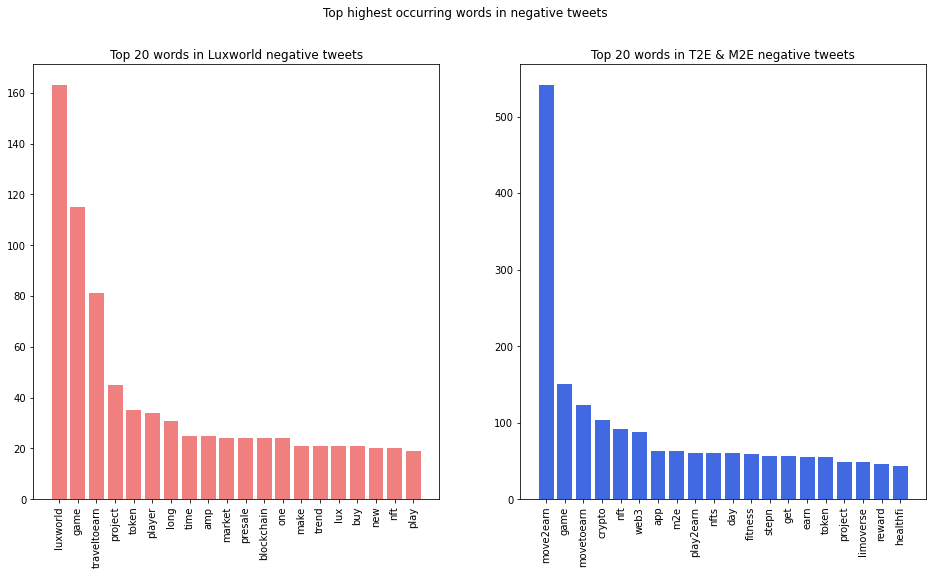

In [114]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# Create a bar plot of word vs count on the first axis
ax[0].bar(x=freq_dataframe_neg.Words, height=freq_dataframe_neg.Count, color='lightcoral')
ax[0].set_title('Top 20 words in Luxworld negative tweets')
ax[0].set_xticklabels(freq_dataframe_neg.Words, rotation=90)

# Create a bar plot of word vs count on the second axis
ax[1].bar(x=freq_dataframe_neg_trend.Words, height=freq_dataframe_neg_trend.Count, color='royalblue')
ax[1].set_title('Top 20 words in T2E & M2E negative tweets')
ax[1].set_xticklabels(freq_dataframe_neg_trend.Words, rotation=90)

# Add a title to the Figure
fig.suptitle('Top highest occurring words in negative tweets')

From the above bar graphs and WordClouds of Luxworld, we can see that some of the words in the positive tweets are airdrop, presale, luck, d2e, m2e etc whereas some of the words used in negative tweets are game, token, time, amp, market etc.

And for T2E and M2e bar graphs and WordClouds, besides words move to earn and crypto, NFT, app, web3, rewards, utilities etc are positive words and game, StepN, earn etc are negative words. 

**Trendline**

In [138]:
#Plot the Sentiment over time for LuxWorld's tweet
luxworld_tweet["Datetime"] = pd.to_datetime(luxworld_tweet.Datetime) 
timeline = luxworld_tweet.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='vals')



[Text(0.5, 1.0, "Trendline of Luxworld's Sentiment since October to December, 2022")]

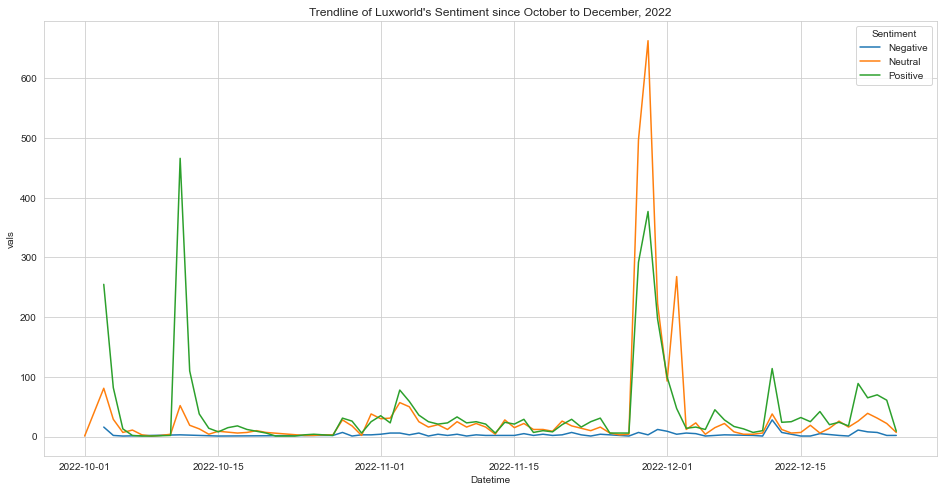

In [144]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.set_style("whitegrid")
sns.lineplot(x="Datetime", y="vals", hue="Sentiment", data=timeline).set(title="Trendline of Luxworld's Sentiment since October to December, 2022")

From the above graph, we can see that October had the lowest number of tweets as compared to November and  October about Luxworld's tweets. Especially, the number of positive tweets got peak on around 27-29/11 - the presale started and 11-13/10. The tweets in December was quite stable though not too high. 

In [148]:
#save the clean tweets of Luxworld and Trend for later using. 
luxworld_tweet.to_csv("luxworld_tweet_clean.csv", index=False, header=True)

In [149]:
trend_tweets.to_csv("trend_tweet_clean.csv", index=False, header=True)